# Capstone Project 2 Data Wrangling

## Problem Statement:
COVID-19 pandemic has heavily impacted the United States from March 2020. Up to date, the total cases has accumulated to 28 million and deaths ~ 0.5 million with fatality rate ~1.8% nationly. In this study we are going to work on how did COVID-19 impact state by state over time, how did COVID-19 impact two gender groups, and how did COVID-19 impact age groups. Potentially we will look into how government policy influences covid-19 cases/deaths. This work will take about 1 month time. And the results could give guidance to people and/or the state government in future. 
 


## Data Sources:
CDC webpage provides certain dataset. The dataset for this study is United States COVID-19 Cases and Deaths by State over Time.
The downloading link is https://covid.cdc.gov/covid-data-tracker/#datatracker-home
Potential other data needed: 
1. Population in US states (US census, or state webpage)
2. COVID-19 government policy in US states (state webpage)


### import modules and import data

In [272]:
# import modules

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [273]:
# import data
data = pd.read_csv('United_States_COVID-19_Cases_and_Deaths_by_State_over_Time.csv')

In [274]:
data.head()

,submission_date,state,tot_cases,conf_cases,prob_cases,new_case,pnew_case,tot_death,conf_death,prob_death,new_death,pnew_death,created_at,consent_cases,consent_deaths
0,05/04/2020,KY,5245,5245.0,0.0,115,0.0,261,261.0,0.0,8,0.0,05/05/2020 05:25:08 PM,Agree,Agree
1,03/23/2020,NH,101,NaN,NaN,23,NaN,1,NaN,NaN,1,NaN,03/26/2020 04:22:39 PM,Not agree,Not agree
2,04/11/2020,IL,19180,NaN,NaN,1293,NaN,677,NaN,NaN,81,NaN,04/10/2020 04:22:39 PM,Agree,Agree
3,01/01/2021,FL,1300528,NaN,NaN,0,6063.0,21673,NaN,NaN,0,7.0,01/02/2021 02:50:51 PM,Not agree,Not agree
4,04/09/2020,PA,18228,NaN,NaN,1989,NaN,338,NaN,NaN,28,NaN,04/08/2020 04:22:39 PM,Agree,Not agree


### Remove features with too many NaN values and not needed for the study

In [275]:
# we will focus on the features of 'submission_date', 'state', 'tot_cases', 'tot_death', 'created_at', since others have a lot of NaN values

df = data[['submission_date', 'state', 'tot_cases', 'tot_death', 'created_at']]
df.head()

,submission_date,state,tot_cases,tot_death,created_at
0,05/04/2020,KY,5245,261,05/05/2020 05:25:08 PM
1,03/23/2020,NH,101,1,03/26/2020 04:22:39 PM
2,04/11/2020,IL,19180,677,04/10/2020 04:22:39 PM
3,01/01/2021,FL,1300528,21673,01/02/2021 02:50:51 PM
4,04/09/2020,PA,18228,338,04/08/2020 04:22:39 PM


In [276]:
df.info()
# need to convert the date to date format

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23880 entries, 0 to 23879
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   submission_date  23880 non-null  object
 1   state            23880 non-null  object
 2   tot_cases        23880 non-null  int64 
 3   tot_death        23880 non-null  int64 
 4   created_at       23880 non-null  object
dtypes: int64(2), object(3)
memory usage: 932.9+ KB


In [277]:
df.describe()

,tot_cases,tot_death
count,2.388000e+04,23880.000000
mean,1.274837e+05,2884.435595
std,2.760387e+05,5372.139813
min,0.000000e+00,0.000000
25%,4.567500e+02,8.000000
50%,2.385500e+04,561.000000
75%,1.374790e+05,3278.750000
max,3.446611e+06,49338.000000


In [278]:
df.shape

(23880, 5)

### check null values

In [279]:
# check to see weather we have null values or not. 0 is found....
df.isnull().sum()

submission_date    0
state              0
tot_cases          0
tot_death          0
created_at         0
dtype: int64

### convert the date to datetime

In [280]:
# convert the time to datetime

df['submission_date'] = pd.to_datetime(df.submission_date)

<ipython-input-280-aa4ab1fbfa75>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['submission_date'] = pd.to_datetime(df.submission_date)


In [281]:
df.head()

,submission_date,state,tot_cases,tot_death,created_at
0,2020-05-04,KY,5245,261,05/05/2020 05:25:08 PM
1,2020-03-23,NH,101,1,03/26/2020 04:22:39 PM
2,2020-04-11,IL,19180,677,04/10/2020 04:22:39 PM
3,2021-01-01,FL,1300528,21673,01/02/2021 02:50:51 PM
4,2020-04-09,PA,18228,338,04/08/2020 04:22:39 PM


### remove the rows with 0 total cases. Those days are before the pandemic

In [282]:
# drop tot_death ==0 the rows
df = df[df.tot_cases!=0]

### Add total_death_rate to df 

In [283]:
df['tot_death_rate'] = df.tot_death/df.tot_cases

In [284]:
df.head()

,submission_date,state,tot_cases,tot_death,created_at,tot_death_rate
0,2020-05-04,KY,5245,261,05/05/2020 05:25:08 PM,0.049762
1,2020-03-23,NH,101,1,03/26/2020 04:22:39 PM,0.009901
2,2020-04-11,IL,19180,677,04/10/2020 04:22:39 PM,0.035297
3,2021-01-01,FL,1300528,21673,01/02/2021 02:50:51 PM,0.016665
4,2020-04-09,PA,18228,338,04/08/2020 04:22:39 PM,0.018543


### This part is to get the daily cases, daily death, and daily death rate
We will sort the dataframe by date and then calculate the daily case, daily death, and daily death rate for each state


In [287]:
states = list(set(df.state))

df_v1 = pd.DataFrame()

for st in states:
    daily_cases=[]
    daily_death=[]
    
    df_st = df[df.state == st].sort_values(by=['submission_date'])
    df_st.reset_index(inplace=True)
    
    daily_cases.append(df_st.iloc[0][3])
    daily_death.append(df_st.iloc[0][4])
    
    for i in range(1, len(df_st.tot_cases)):
        daily_cases.append(df_st.tot_cases[i]-df_st.tot_cases[i-1]) 
        daily_death.append(df_st.tot_death[i]-df_st.tot_death[i-1])
    df_st['daily_cases'] = daily_cases
    df_st['daily_death'] = daily_death
    df_v1 = df_v1.append(df_st)
    #df_st = pd.DataFrame()


In [289]:
df_v1.shape

(20182, 9)

In [290]:
df_v1.tail()

,index,submission_date,state,tot_cases,tot_death,created_at,tot_death_rate,daily_cases,daily_death
391,11587,2021-02-18,IL,1168683,22297,02/19/2021 03:33:51 PM,0.019079,1966,73
392,2247,2021-02-19,IL,1170902,22368,02/20/2021 02:45:37 PM,0.019103,2219,71
393,10613,2021-02-20,IL,1172824,22426,02/21/2021 02:57:50 PM,0.019121,1922,58
394,8469,2021-02-21,IL,1174409,22466,02/22/2021 02:53:38 PM,0.019130,1585,40
395,1335,2021-02-22,IL,1175655,22506,02/23/2021 02:51:13 PM,0.019143,1246,40


### check daily cases and daily death for nagative values

In [294]:
df_v1[df_v1.daily_cases < 0].count()

index              75
submission_date    75
state              75
tot_cases          75
tot_death          75
created_at         75
tot_death_rate     75
daily_cases        75
daily_death        75
dtype: int64

In [295]:
df_v1[df_v1.daily_death < 0].count()

index              160
submission_date    160
state              160
tot_cases          160
tot_death          160
created_at         160
tot_death_rate     160
daily_cases        160
daily_death        160
dtype: int64

we found a lot of negative values for daily cases and daily death. This is not making sense. 
we need to figure out how to handle them

### I will pick one state or two to do a deeper investigation

In [317]:
FL = df_v1[df_v1.state == 'FL']
CA = df_v1[df_v1.state == 'CA']
NY = df_v1[df_v1.state == 'NY']
SD = df_v1[df_v1.state == 'SD']

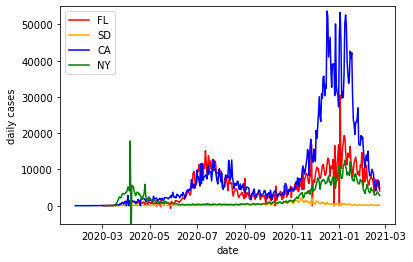

In [334]:
plt.plot(FL.submission_date, FL.daily_cases, color='red',label='FL')
plt.plot(SD.submission_date, SD.daily_cases, color='orange',label='SD')
plt.plot(CA.submission_date, CA.daily_cases, color='blue', label='CA')
plt.plot(NY.submission_date, NY.daily_cases, color='green', label='NY')
plt.ylim(-5000, 55000)
plt.xlabel('date')
plt.ylabel('daily cases')
plt.legend()
plt.show()

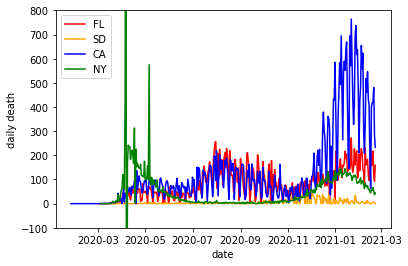

In [337]:
plt.plot(FL.submission_date, FL.daily_death, color='red',label='FL')
plt.plot(SD.submission_date, SD.daily_death, color='orange',label='SD')
plt.plot(CA.submission_date, CA.daily_death, color='blue', label='CA')
plt.plot(NY.submission_date, NY.daily_death, color='green', label='NY')
plt.ylim(-100, 800)
plt.xlabel('date')
plt.ylabel('daily death')
plt.legend()
plt.show()

The daily death of CA has very weird pattern. Is this true or ...???? Daily cases also have notches....

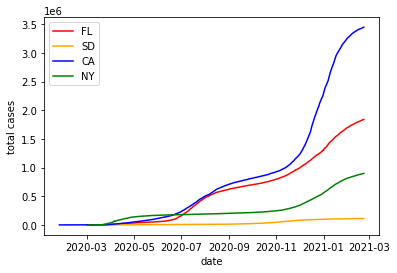

In [329]:
plt.plot(FL.submission_date, FL.tot_cases, color='red',label='FL')
plt.plot(SD.submission_date, SD.tot_cases, color='orange',label='SD')
plt.plot(CA.submission_date, CA.tot_cases, color='blue', label='CA')
plt.plot(NY.submission_date, NY.tot_cases, color='green', label='NY')
plt.xlabel('date')
plt.ylabel('total cases')
plt.legend()
plt.show()

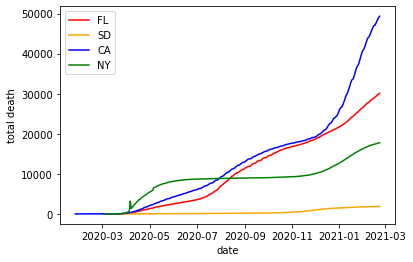

In [326]:
plt.plot(FL.submission_date, FL.tot_death, color='red',label='FL')
plt.plot(SD.submission_date, SD.tot_death, color='orange',label='SD')
plt.plot(CA.submission_date, CA.tot_death, color='blue', label='CA')
plt.plot(NY.submission_date, NY.tot_death, color='green', label='NY')
plt.xlabel('date')
plt.ylabel('total death')
plt.legend()
plt.show()

Total cases and total death have very smooth curves. 
They look ok.

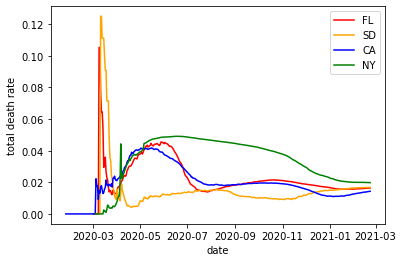

In [339]:
plt.plot(FL.submission_date, FL.tot_death_rate, color='red',label='FL')
plt.plot(SD.submission_date, SD.tot_death_rate, color='orange',label='SD')
plt.plot(CA.submission_date, CA.tot_death_rate, color='blue', label='CA')
plt.plot(NY.submission_date, NY.tot_death_rate, color='green', label='NY')
plt.xlabel('date')
plt.ylabel('total death rate')
plt.legend()
plt.show()

Total death rate looks ok here. We will leave it to EDA for more dig in

### This is a preliminary check on the dataset. We stop here for the data wrangling part.

We added daily cases, daily death to the dataset, but we found negative values, and weird patterns for daily death.

It is arguable weather daily cases and daily death are trustable data.

I will talk with my mentor first. 
